<a href="https://colab.research.google.com/github/Ruchira1214/projectSample/blob/main/Assignment_B_Marketing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

# 1. Load Data
df = pd.read_excel('Marketing Data - Hiring.xlsx')
# 2. Get unique Activities
print(df['Activity'].unique())

['Sent' 'Delivered' 'Open' 'Bounce' 'Click' 'Unsubscribe' 'Hard Bounce']


In [14]:
# --- CALCULATE OVERALL METRICS ---

# 1. This removes hidden spaces (e.g., "Communication Source " -> "Communication Source")
df.columns = df.columns.str.strip()

# 2. Date Setup
df['Activity Date'] = pd.to_datetime(df['Activity Date'], dayfirst=True)
df['Month'] = df['Activity Date'].dt.to_period('M').astype(str) # Convert to string for easier plotting

# --- DEFINITIONS ---
# Based on unique values
engagement_actions = ['Open', 'Click']

# 3. OVERALL METRICS
total_reach = df['Physician ID'].nunique()
total_attempts = len(df)
frequency = total_attempts / total_reach
# Count rows where Activity is in our "Good" list
total_engagement = df[df['Activity'].isin(engagement_actions)].shape[0]

print("--- OVERALL RESULTS ---")
print(f"Total Reach: {total_reach}")
print(f"Frequency: {frequency:.2f}")
print(f"Total Engagement: {total_engagement}")

--- OVERALL RESULTS ---
Total Reach: 25208
Frequency: 3.97
Total Engagement: 18521


In [15]:
# 4. SEGMENTATION
# Group by Source, Channel, and Month
segmentation = df.groupby(['Communication Source', 'Source Channel Name', 'Month']).agg(
    Reach=('Physician ID', 'nunique'),
    Total_Attempts=('Physician ID', 'count'),
    Engagement=('Activity', lambda x: x.isin(engagement_actions).sum())
).reset_index()

# Calculate Frequency per segment
segmentation['Frequency'] = segmentation['Total_Attempts'] / segmentation['Reach']

# Save for your report
segmentation.to_csv('final_marketing_analysis.csv', index=False)
print("\nSegmentation calculated and saved to 'final_marketing_analysis.csv'")


Segmentation calculated and saved to 'final_marketing_analysis.csv'


/tmp/ipython-input-363200866.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_reach, x='Physician ID', y='Communication Source', palette='viridis')


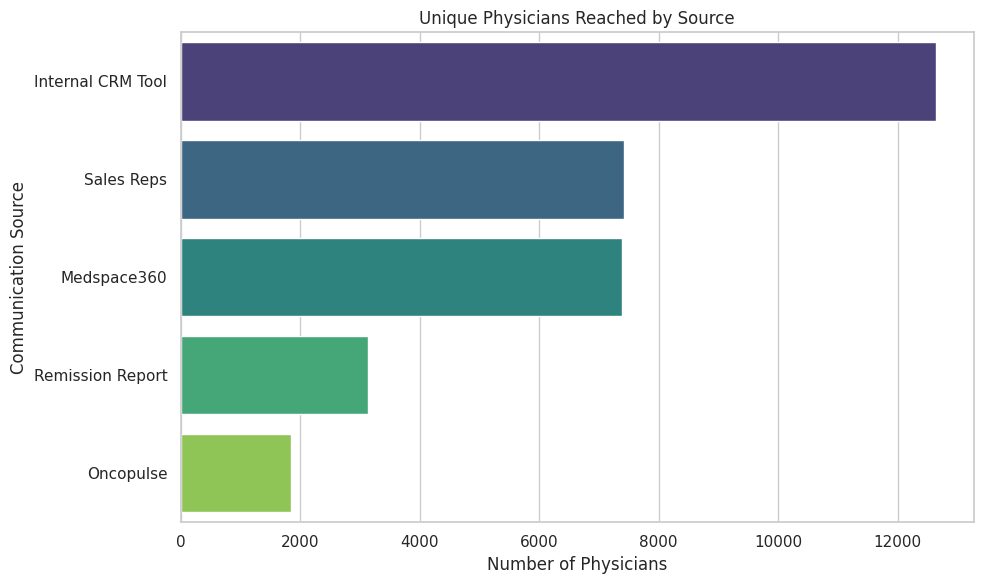

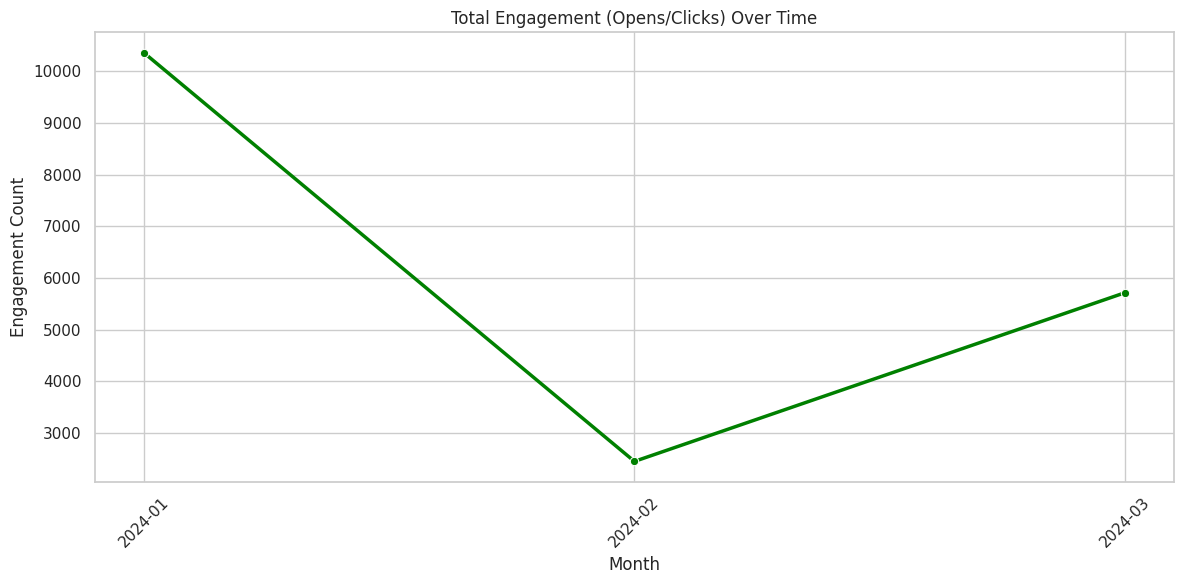

/tmp/ipython-input-363200866.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_stats, x='Engagement Rate', y='Source Channel Name', palette='magma')


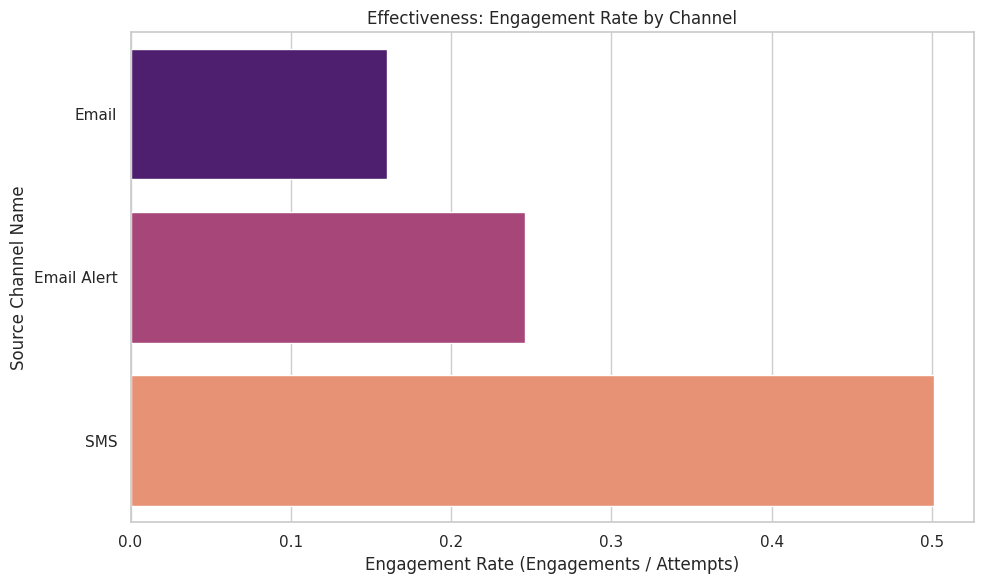

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the visual style
sns.set_theme(style="whitegrid")

# --- ENSURE DATA IS READY ---
# (This assumes you have already run Phase 1 and have 'df' and 'engagement_actions' defined.
# If you get a "name 'df' is not defined" error, you must run Phase 1 again first.)

# CHART 1: Reach by Communication Source
plt.figure(figsize=(10, 6))
# We sum the reach (approximation) or just count unique IDs per source
source_reach = df.groupby('Communication Source')['Physician ID'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=source_reach, x='Physician ID', y='Communication Source', palette='viridis')
plt.title('Unique Physicians Reached by Source')
plt.xlabel('Number of Physicians')
plt.tight_layout()
plt.savefig('Chart_Reach_by_Source.png')
plt.show()

# CHART 2: Engagement Trend Over Time
plt.figure(figsize=(12, 6))
# Aggregate engagement by month
monthly_engagement = df[df['Activity'].isin(engagement_actions)].groupby('Month').size().reset_index(name='Engagement Count')
sns.lineplot(data=monthly_engagement, x='Month', y='Engagement Count', marker='o', color='green', linewidth=2.5)
plt.title('Total Engagement (Opens/Clicks) Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Chart_Engagement_Trend.png')
plt.show()

# CHART 3: Channel Effectiveness (Engagement Rate)
# Let's see which channel gets the most clicks/opens per attempt
channel_stats = df.groupby('Source Channel Name').agg(
    Attempts=('Physician ID', 'count'),
    Engagements=('Activity', lambda x: x.isin(engagement_actions).sum())
).reset_index()
channel_stats['Engagement Rate'] = channel_stats['Engagements'] / channel_stats['Attempts']

plt.figure(figsize=(10, 6))
sns.barplot(data=channel_stats, x='Engagement Rate', y='Source Channel Name', palette='magma')
plt.title('Effectiveness: Engagement Rate by Channel')
plt.xlabel('Engagement Rate (Engagements / Attempts)')
plt.tight_layout()
plt.savefig('Chart_Channel_Effectiveness.png')
plt.show()

In [17]:
# This forces Pandas to print the entire DataFrame as text
print(segmentation.to_string())

  Communication Source Source Channel Name    Month  Reach  Total_Attempts  Engagement  Frequency
0    Internal CRM Tool               Email  2024-01  10107           12521        1050   1.238844
1    Internal CRM Tool               Email  2024-02   9357           16609        1779   1.775035
2    Internal CRM Tool               Email  2024-03  11586           42643        4690   3.680563
3          Medspace360         Email Alert  2024-01   7388            9797        2409   1.326069
4            Oncopulse                 SMS  2024-01    712            1652         771   2.320225
5            Oncopulse                 SMS  2024-02    928            1630         672   1.756466
6            Oncopulse                 SMS  2024-03   1146            1641        1024   1.431937
7     Remission Report               Email  2024-01   3133            4803        4803   1.533035
8           Sales Reps               Email  2024-01   7420            8744        1323   1.178437


In [18]:
# Remove the limit on how many rows are shown
pd.set_option('display.max_rows', None)

# Display the dataframe
display(segmentation)

,Communication Source,Source Channel Name,Month,Reach,Total_Attempts,Engagement,Frequency
0,Internal CRM Tool,Email,2024-01,10107,12521,1050,1.238844
1,Internal CRM Tool,Email,2024-02,9357,16609,1779,1.775035
2,Internal CRM Tool,Email,2024-03,11586,42643,4690,3.680563
3,Medspace360,Email Alert,2024-01,7388,9797,2409,1.326069
4,Oncopulse,SMS,2024-01,712,1652,771,2.320225
5,Oncopulse,SMS,2024-02,928,1630,672,1.756466
6,Oncopulse,SMS,2024-03,1146,1641,1024,1.431937
7,Remission Report,Email,2024-01,3133,4803,4803,1.533035
8,Sales Reps,Email,2024-01,7420,8744,1323,1.178437
